## Predicting Heart Disease using machine learning

Problem : Using python libraries and open-source data, to develope a machine learning algorithm to predict heart disease in patients.

Workflow:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Optimization
7. Experimentation

## 1. Problem definition

> Given a clinical dataset about patients, can we predict which patients have heart disease ?


## 2. Data

The original data set used is the UCI machine learning dataset for heart disease : https://archive.ics.uci.edu/ml/datasets/heart+disease


## 3. Evaluation 

> If we can reach a 95% of accuracy in predicting wheter or not a patient have heart disease, we will pursue the project. 

### 4.  Feature engineering 

This is where you get information a

* Data dictionary :

age
sex
chest pain type (4 values)
resting blood pressure
serum cholestoral in mg/dl
fasting blood sugar > 120 mg/dl
resting electrocardiographic results (values 0,1,2)
maximum heart rate achieved
exercise induced angina
oldpeak = ST depression induced by exercise relative to rest
the slope of the peak exercise ST segment
number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

### Preparing the data analysis tools :
* Pandas
* NumPy
* Matplotlib

In [3]:
# Importing tools 

# Regular EDA (Exploratory data analysis) and plotting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Models from Sklearn.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Models evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve


## Load data

In [5]:
df = pd.read_csv("Data/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## EDA (Exploratory data analysis)

#### Recomendation : Become an expert in the subject matter of the datasets you are using. 

Some questions :
1. What problem are you trying to solve? 
2. How do we treat different types in our data?
3. What is the relation between the features? 
4. What data is missing?
5. Where are the outliers and why you should care about them ?
6. How can you add, remove or change features in your data?

In [8]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

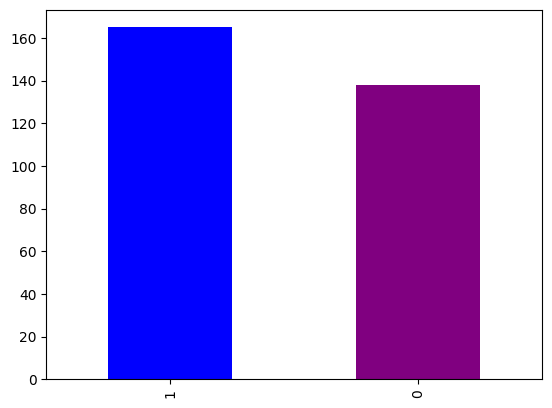

In [11]:
df["target"].value_counts().plot(kind="bar", color=["Blue", "purple"])

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###  Finding patterns : 

* Heart disease frequency according to Sex.

In [19]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [26]:
#1 Compare target value with Sex column 

pd.crosstab(df.target, df.sex)

# Some conclusions (In our data set, not the real world) :
# There are more male with heart disease
# The porcentage of women with heart disease is higher than that of men 

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

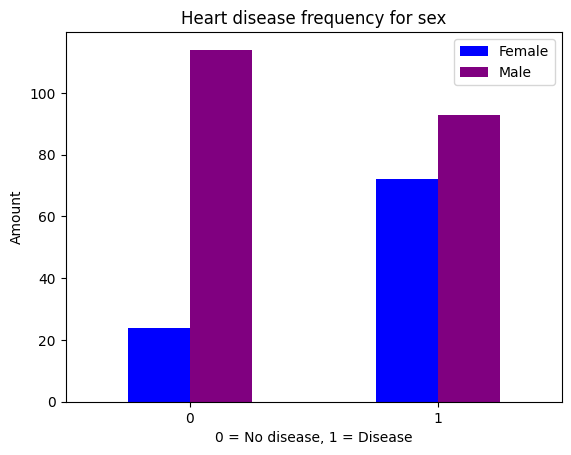

In [27]:
# 2. Create a plot of crosstab 

pd.crosstab(df.target, df.sex).plot(kind="bar", color=["Blue", "Purple"])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age vs Max heart rate for heart disease

In [ ]:
plt.figure(figsize=)